## Numerical VS Categorical

Examples:
- Monthly earnings VS Highest obtained degree
- Body length VS Country of origin
- Happiness rating VS Country of origin
- Sales VS Account Manager. 
- Revenue VS Product Category
- Revenue VS Game genre
- Retention VS Software version
- ...

In univariate analysis for numerical data we've looked at confidence intervals. We can use these to check if there are any signicant differences between categories.

You and I are are going to roll a 6-sided die. The numerical variable is the value we roll and the categorical variable is who rolled it. We know that in reality the average value of a 6-sided die is 3.5 (=(1+2+3+4+5+6)/6). We know that there is no skill involved, so who rolls the die should have no impact on the result. We each roll the die 3 times.
    <img src="https://wherethewindsblow.com/wp-content/uploads/2015/07/JUMBO-Six-sided-white-dice.jpg" style="width: 300px;"/>

In [284]:
diceRolls = pd.DataFrame(data= {'Person': ['you', 'you', 'you', 'me','me','me'], 'Rolls': [6,3,6,2,4,2]})
diceRolls

,Person,Rolls
0,you,6
1,you,3
2,you,6
3,me,2
4,me,4
5,me,2


In [285]:
diceRolls.groupby(by="Person").mean()

,Rolls
Person,
me,2.666667
you,5.000000


Looks like you rolled an average value of 5 and I rolled an average value of ~2.7. Does this mean you are better at rolling dice than me?

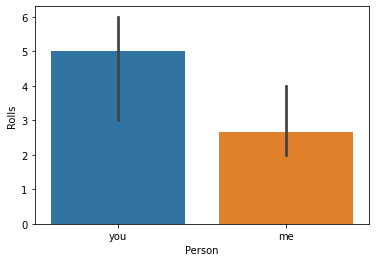

In [286]:
sns.barplot(x="Person", y="Rolls", data=diceRolls)

The confidence intervals overlap. This means that we can not yet be sure that you're a better dice roller than me. If we want the confidence intervals to become smaller, we'll need more data which means we need to do more dice rolls.

Let's look if there are significant difference between iris species.

In [287]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [288]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [289]:
numericalColumnToCheck = "sepal"

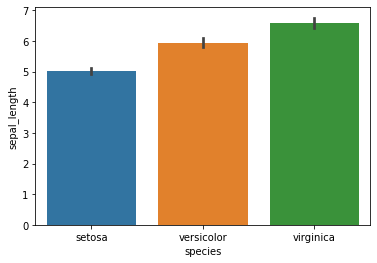

In [290]:
sns.barplot(y="sepal_length", x="species", data=iris) 
# Add parameter ci if you want to change certainty of confidence interval. 
# For example ci = 99 for 99% certainty.
# The default is 95%

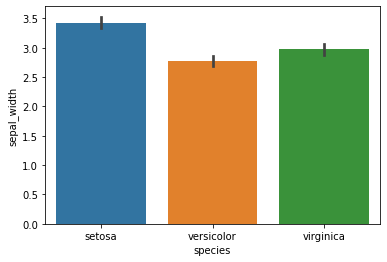

In [291]:
sns.barplot(y="sepal_width", x="species", data=iris)

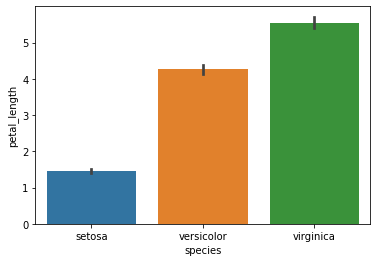

In [292]:
sns.barplot(y="petal_length", x="species", data=iris)

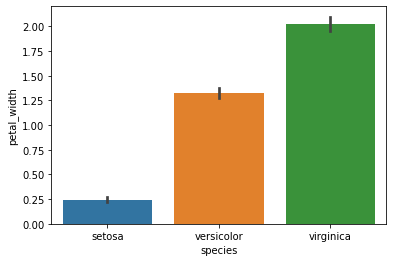

In [293]:
sns.barplot(y="petal_width", x="species", data=iris)

### Portfolio assignment 11
20 min: Do a Numerical VS Categorical bivariate analysis on the penguins dataset.
- Choose one of the categorical columns: species, island or sex
- use .groupby('<columnname>').mean() too look at the means of the numerical columns. Does it look like there is a difference between categories?
- Use the seaborn barplot to plot the mean and confidence. Create this plot for each of the numerical columns (bill_length_mm	bill_depth_mm, flipper_length_mm, body_mass_g)
- For each of the plots, write a conclusion: Is there a statistically significant difference for this numerical column for each category?
- Optional: Repeat this proces for the other two categorical columns

In [294]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [86]:
penguins_color = penguins.corr()
penguins_color.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.24,0.66,0.60
bill_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


![](https://www.galapagos.org/wp-content/uploads/2019/04/PenguinMeasurements_BLOGv3.png)

![](https://i.imgur.com/0v1CGNV.png)

Ik pak de categorische kolom 'geslacht'. Ik verwacht dat de gemiddelde grootte van een mannetje groter is dan een vrouwtjes pinguïn.

In [89]:
penguins.groupby(by="sex").mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
Female,42.096970,16.425455,197.363636,3862.272727
Male,45.854762,17.891071,204.505952,4545.684524


We kunnen hieruit concluderen dat een mannetjes pinguïn groter is dan een vrouwtjes pinguïn.

Text(0.5, 1.0, 'Bill Length in mm - Male vs Female')

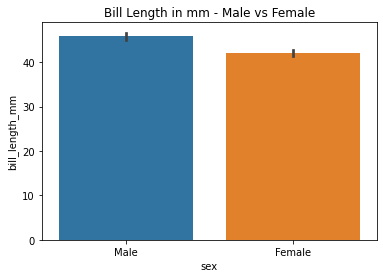

In [107]:
sns.barplot(y="bill_length_mm", x="sex", data=penguins).set_title('Bill Length in mm - Male vs Female')

Hier kunnen we zien dat de snavel lengte van een mannetjes pinguïn ietsjes langer is dan die van een vrouwtjes pinguïn.

Text(0.5, 1.0, 'Bill depth in mm - Male vs Female')

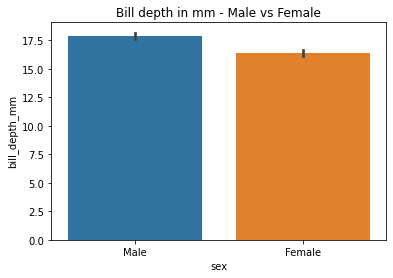

In [106]:
sns.barplot(y="bill_depth_mm", x="sex", data=penguins).set_title('Bill depth in mm - Male vs Female')

Hetzelfde geldt voor de diepte van de snavel.

Text(0.5, 1.0, 'Flipper Length in mm - Male vs Female')

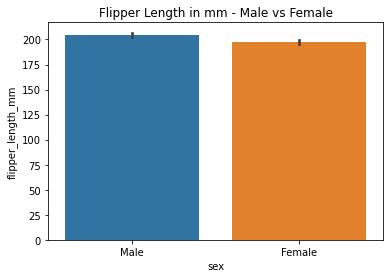

In [103]:
sns.barplot(y="flipper_length_mm", x="sex", data=penguins).set_title('Flipper Length in mm - Male vs Female')

Hieruit kunnen we zien dat de flipper lengte van een mannetjes pinguïn nét iets langer is dan die van een vrouwtjes pinguïn.

Text(0.5, 1.0, 'Body Mass in g - Male vs Female')

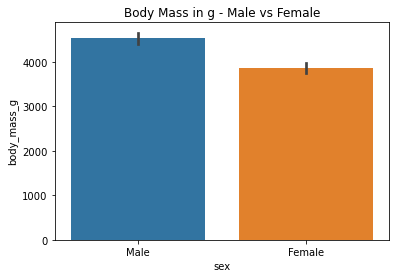

In [105]:
sns.barplot(y="body_mass_g", x="sex", data=penguins).set_title('Body Mass in g - Male vs Female')

Het verschil in gewicht is significant hoger.. Dat is logisch, sinds een mannetje net wat groter is dan een vrouwtjes pinguïn. Gewicht is namelijk ook meer verandelijk dan de lengte van bijvoorbeeld de flipper lengte.

### Portfolio assignment 12
30 min: Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4. Use <em>.groupby('columnname').mean()</em> to calculate the means. Is there a difference between categories? Then use seaborn barplots to check if there is a statistically significant difference. 

In [109]:
import pandas as pd

movies = pd.read_csv (r'movies.csv')

In [111]:
movies_color = movies.corr()
movies_color.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.00,-0.09,0.51,0.73,0.27,0.09,0.59
id,-0.09,1.00,0.03,-0.05,-0.15,-0.27,-0.00
popularity,0.51,0.03,1.00,0.64,0.23,0.27,0.78
revenue,0.73,-0.05,0.64,1.00,0.25,0.20,0.78
runtime,0.27,-0.15,0.23,0.25,1.00,0.38,0.27
vote_average,0.09,-0.27,0.27,0.20,0.38,1.00,0.31
vote_count,0.59,-0.00,0.78,0.78,0.27,0.31,1.00


In [112]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

### Status en aantal beoordelingen

In [117]:
movies.groupby(by="status").mean()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
status,,,,,,,
Post Production,1.300000e+06,234866.0000,1.084362,2.805777e+05,95.666667,5.500000,12.333333
Released,2.909267e+07,57051.8878,21.527415,8.239771e+07,106.915084,6.093306,691.360792
Rumored,1.120000e+04,59484.2000,0.061864,0.000000e+00,76.000000,5.360000,1.000000


Text(0.5, 1.0, 'Vote Count - Status of Movie')

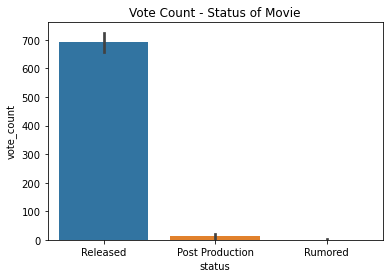

In [145]:
sns.barplot(y="vote_count", x="status", data=movies).set_title('Vote Count - Status of Movie')

Er wordt verwacht dat films die momenteel geproduceerd of een gerucht is, geen of amper een vote count heeft. Uitgekomen films hebben een relatief hoger percentage van de vote counts per film.

### Taal en populariteit

In [120]:
movies.groupby(by="original_language").mean()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
original_language,,,,,,,
af,3.000000e+06,868.000000,2.504169,9.879971e+06,94.000000,6.900000,94.000000
ar,0.000000e+00,83505.000000,4.723389,0.000000e+00,92.000000,7.300000,53.500000
cn,1.072641e+07,109470.500000,10.631343,3.374016e+07,104.750000,6.500000,220.916667
cs,0.000000e+00,185196.000000,1.286848,0.000000e+00,104.500000,5.650000,12.000000
da,9.742857e+06,33440.714286,17.663925,2.989889e+07,121.428571,7.128571,450.428571
de,8.616354e+06,63369.518519,10.151382,1.396191e+07,107.777778,6.325926,242.444444
el,0.000000e+00,38810.000000,28.858238,1.101970e+05,94.000000,6.900000,332.000000
en,3.039436e+07,55788.758047,22.177435,8.647885e+07,106.471581,6.065683,719.023751
es,5.847683e+06,73720.937500,13.330804,1.865218e+07,109.093750,6.659375,301.875000


Text(0.5, 1.0, 'Popularity - Language of Movie')

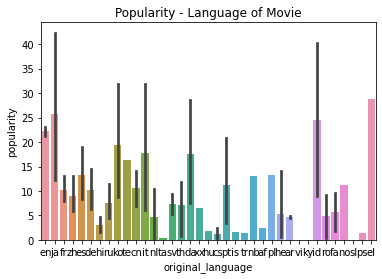

In [141]:
sns.barplot(y="popularity", x="original_language", data=movies).set_title('Popularity - Language of Movie')

Je ziet dat Engelstalige films best populair zijn, met een kleine kans dat er verschil zit tussen de data (zwart streep). De Japanse films zien er erg populair uit, maar er is te weinig data daarvan, waardoor er een grote kans is dat er verschil kan zitten in de data.

### Taal en aantal beoordelingen

Text(0.5, 1.0, 'Vote Average - Language of Movie')

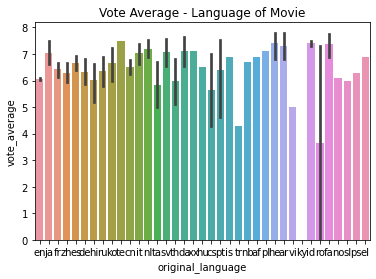

In [142]:
sns.barplot(y="vote_average", x="original_language", data=movies).set_title('Vote Average - Language of Movie')

Hier zie je weer dat bij de Engelstalige films erg weinig verschil in data kan zitten. Dit komt weer vanwege het aantal datarecords per taal. We zien hieruit wel dat Engelstalige films een stabiele en gemiddelde beoordelig hebben van 6.1.